In [5]:
# info
import pandas as pd
df = pd.read_csv("C:\\UIT\\HK3-II\\MathForComputerScience\\Dataset\\diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# fitting the missing values with mean values
for i in range(1,6):
    temp_1 = df.loc[(df["Outcome"]==1) & (df[df.columns[i]]!=0), df.columns[i]].mean()
    temp_0 = df.loc[(df["Outcome"]==0) & (df[df.columns[i]]!=0), df.columns[i]].mean()
    df.loc[(df["Outcome"]==1,df.columns[i])]=df.loc[(df["Outcome"]==1,df.columns[i])].replace(0,temp_1)
    df.loc[(df["Outcome"]==0,df.columns[i])]=df.loc[(df["Outcome"]==0,df.columns[i])].replace(0,temp_0)

In [7]:
# split into features and label group
features = df.drop(columns = ["Outcome"])
targets = df["Outcome"]
targets.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# over sampler
from imblearn import over_sampling
over_sampler = over_sampling.RandomOverSampler(random_state = 42)
features, targets = over_sampler.fit_resample(features, targets)
targets.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [9]:
# Data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
features = scaler.transform(features)

In [10]:
# Train-test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=float(1/3),random_state = 42)

In [14]:
#Drawing the tn,fp,fn,tp
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
def drawing(cnf_matrix):
    group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
    group_percentages = [
        "{0:.2%}".format(value) for value in cnf_matrix.flatten() / np.sum(cnf_matrix)
    ]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    dr = sb.heatmap(
        cnf_matrix,
        annot=labels,
        fmt="",
        cmap=sb.light_palette("#44ffd5", as_cmap=True),
    )
    dr.set_title("Evaluation metrics")
    dr.set_xlabel("\nPredicted Values")
    dr.xaxis.set_ticklabels(["False", "True"])
    dr.yaxis.set_ticklabels(["False", "True"])
    plt.show()

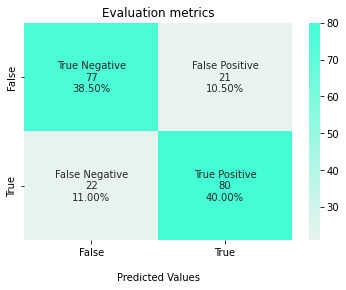

The accuracy score: 0.785
The precision score:0.7920792079207921
The recall score: 0.7843137254901961
The f1 score: 0.7881773399014778


In [12]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_train,y_train)
y_pred_LR = LR.predict(x_val)
cnf_matrix = metrics.confusion_matrix(y_val,y_pred_LR)
drawing(cnf_matrix)
print(f"The accuracy score: {metrics.accuracy_score(y_val, y_pred_LR)}")
print(f"The precision score:{metrics.precision_score(y_val, y_pred_LR)}")
print(f"The recall score: {metrics.recall_score(y_val, y_pred_LR)}")
print(f"The f1 score: {metrics.f1_score(y_val, y_pred_LR)}")

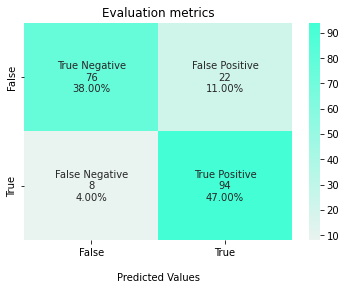

The accuracy score: 0.85
The precision score:0.8103448275862069
The recall score: 0.9215686274509803
The f1 score: 0.8623853211009175


In [37]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 1).fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_val)
cnf_matrix_KNN = metrics.confusion_matrix(y_val,y_pred_KNN)
drawing(cnf_matrix_KNN)
print(f"The accuracy score: {metrics.accuracy_score(y_val, y_pred_KNN)}")
print(f"The precision score:{metrics.precision_score(y_val, y_pred_KNN)}")
print(f"The recall score: {metrics.recall_score(y_val, y_pred_KNN)}")
print(f"The f1 score: {metrics.f1_score(y_val, y_pred_KNN)}")

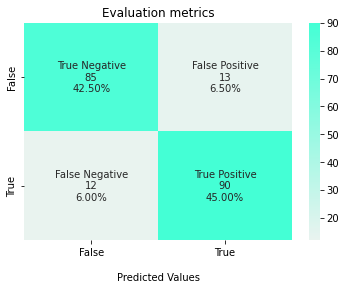

The accuracy score: 0.875
The precision score:0.8737864077669902
The recall score: 0.8823529411764706
The f1 score: 0.8780487804878048


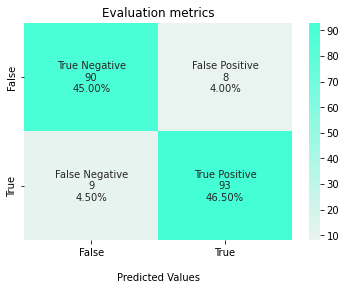

The accuracy score: 0.915
The precision score:0.9207920792079208
The recall score: 0.9117647058823529
The f1 score: 0.9162561576354681


In [20]:
# Decision tree with gini and entropy criterion
# Gini criterion
from sklearn.tree import DecisionTreeClassifier
Gini = DecisionTreeClassifier(criterion = "gini").fit(x_train,y_train)
y_pred_gini = Gini.predict(x_val)
cnf_matrix_gini = metrics.confusion_matrix(y_val,y_pred_gini)
drawing(cnf_matrix_gini)
print(f"The accuracy score: {metrics.accuracy_score(y_val, y_pred_gini)}")
print(f"The precision score:{metrics.precision_score(y_val, y_pred_gini)}")
print(f"The recall score: {metrics.recall_score(y_val, y_pred_gini)}")
print(f"The f1 score: {metrics.f1_score(y_val, y_pred_gini)}")
# entropy criterion
Entropy = DecisionTreeClassifier(criterion = "entropy").fit(x_train,y_train)
y_pred_entropy = Entropy.predict(x_val)
cnf_matrix_entropy = metrics.confusion_matrix(y_val,y_pred_entropy)
drawing(cnf_matrix_entropy)
print(f"The accuracy score: {metrics.accuracy_score(y_val, y_pred_entropy)}")
print(f"The precision score:{metrics.precision_score(y_val, y_pred_entropy)}")
print(f"The recall score: {metrics.recall_score(y_val, y_pred_entropy)}")
print(f"The f1 score: {metrics.f1_score(y_val, y_pred_entropy)}")

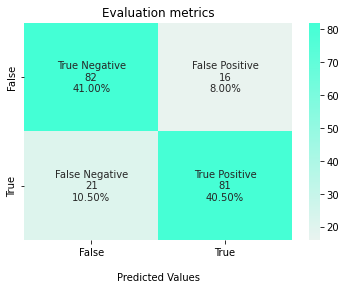

The accuracy score: 0.815
The precision score:0.8350515463917526
The recall score: 0.7941176470588235
The f1 score: 0.8140703517587939


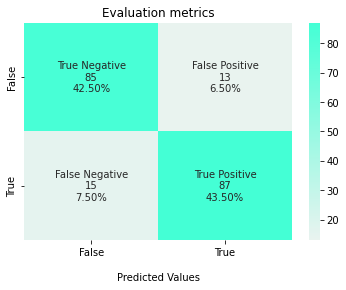

The accuracy score: 0.86
The precision score:0.87
The recall score: 0.8529411764705882
The f1 score: 0.8613861386138614


In [21]:
# Support vector machine with linear and rbf kernel
# linear kernel
from sklearn.svm import SVC
Linear = SVC(kernel = 'linear').fit(x_train,y_train)
y_pred_linear = Linear.predict(x_val)
cnf_matrix_linear = metrics.confusion_matrix(y_val,y_pred_linear)
drawing(cnf_matrix_linear)
print(f"The accuracy score: {metrics.accuracy_score(y_val, y_pred_linear)}")
print(f"The precision score:{metrics.precision_score(y_val, y_pred_linear)}")
print(f"The recall score: {metrics.recall_score(y_val, y_pred_linear)}")
print(f"The f1 score: {metrics.f1_score(y_val, y_pred_linear)}")
# rbf kernel
rbf = SVC(kernel = "rbf").fit(x_train,y_train)
y_pred_rbf = rbf.predict(x_val)
cnf_matrix_rbf = metrics.confusion_matrix(y_val,y_pred_rbf)
drawing(cnf_matrix_rbf)
print(f"The accuracy score: {metrics.accuracy_score(y_val, y_pred_rbf)}")
print(f"The precision score:{metrics.precision_score(y_val, y_pred_rbf)}")
print(f"The recall score: {metrics.recall_score(y_val, y_pred_rbf)}")
print(f"The f1 score: {metrics.f1_score(y_val, y_pred_rbf)}")

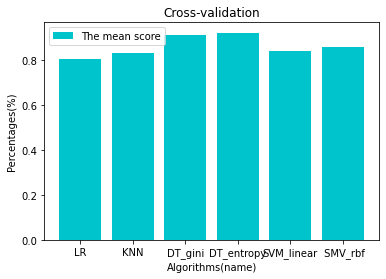

In [32]:
# cross validation to evaluate
from sklearn.model_selection import cross_val_score
list_score = []
list_name = ["LR", "KNN", "DT_gini", "DT_entropy", "SVM_linear", " SMV_rbf"]
list_score.append((cross_val_score(LR,features, targets, cv = 10)).mean())
list_score.append((cross_val_score(KNN,features, targets, cv = 10)).mean())
list_score.append((cross_val_score(Gini,features, targets, cv = 10)).mean())
list_score.append((cross_val_score(Entropy,features, targets, cv = 10)).mean())
list_score.append((cross_val_score(Linear,features, targets, cv = 10)).mean())
list_score.append((cross_val_score(rbf,features, targets, cv = 10)).mean())
plt.bar(list_name, list_score, color="#00c4cc", label="The mean score")
plt.legend(loc="upper left")
plt.xlabel("Algorithms(name)")
plt.ylabel("Percentages(%)")
plt.title("Cross-validation")
plt.show()